### Load Necessary Libraries

In [136]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import f_oneway, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib import *
import matplotlib.colors as mcolors
from scipy.stats import kruskal
import scikit_posthocs as sp
from scipy.stats import mannwhitneyu
import PyNonpar
from PyNonpar.twosample import wilcoxon_mann_whitney_test
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings

### Exploration of the dataset

In [137]:
# I loaded data from the csv file into a DataFrame and save in a variable named greenhouse.
greenhouse = pd.read_csv('Advanced_IoT_Dataset.csv')

In [138]:
greenhouse.head()

,Random,Average of chlorophyll in the plant (ACHP),Plant height rate (PHR),Average wet weight of the growth vegetative (AWWGV),Average leaf area of the plant (ALAP),Average number of plant leaves (ANPL),Average root diameter (ARD),Average dry weight of the root (ADWR),Percentage of dry matter for vegetative growth (PDMVG),Average root length (ARL),Average wet weight of the root (AWWR),Average dry weight of vegetative plants (ADWV),Percentage of dry matter for root growth (PDMRG),Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA


In [47]:
greenhouse.size

420000

In [139]:
greenhouse.shape

(30000, 14)

In [140]:
greenhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Random                                                   30000 non-null  object 
 1    Average  of chlorophyll in the plant (ACHP)             30000 non-null  float64
 2    Plant height rate (PHR)                                 30000 non-null  float64
 3   Average wet weight of the growth vegetative (AWWGV)      30000 non-null  float64
 4   Average leaf area of the plant (ALAP)                    30000 non-null  float64
 5   Average number of plant leaves (ANPL)                    30000 non-null  float64
 6   Average root diameter (ARD)                              30000 non-null  float64
 7    Average dry weight of the root (ADWR)                   30000 non-null  float64
 8    Percentage of dry matter 

In [141]:
# Filtering duplicated values
greenhouse.duplicated().sum()

np.int64(0)

In [142]:
greenhouse['Random'].value_counts()

Random
R1    10045
R3     9996
R2     9959
Name: count, dtype: int64

In [143]:
greenhouse['Class'].value_counts()

Class
SA    5000
SB    5000
SC    5000
TA    5000
TB    5000
TC    5000
Name: count, dtype: int64

In [144]:
# I renamed the columns and rows which are needed for the statistical analysis and organized them.
greenhouse.rename(columns={'Random': 'Plant Category', ' Average  of chlorophyll in the plant (ACHP)': 'ACHP', 'Average leaf area of the plant (ALAP)': 'ALAP', 'Average number of plant leaves (ANPL)': 'ANPL', 'Class': 'Condition'}, inplace=True)
greenhouse_stat =greenhouse[['Plant Category', 'ACHP', 'ALAP', 'ANPL', 'Condition']]
R1 = greenhouse_stat.loc[greenhouse_stat['Plant Category'] == 'R1']
R2 = greenhouse_stat.loc[greenhouse_stat['Plant Category'] == 'R2']
R3 = greenhouse_stat.loc[greenhouse_stat['Plant Category'] == 'R3']
greenhouse_stat2 = greenhouse_stat[['ACHP', 'ALAP', 'ANPL']]
greenhouse_stat

,Plant Category,ACHP,ALAP,ANPL,Condition
0,R1,34.533468,1284.229549,4.999713,SA
1,R1,34.489028,1284.247744,5.024259,SA
2,R2,33.100405,1009.208996,5.007652,SA
3,R1,34.498319,1284.227623,4.991501,SA
4,R3,36.297008,981.470310,4.003682,SA
...,...,...,...,...,...
29995,R3,46.400873,744.310093,4.012024,TC
29996,R3,46.395047,744.307234,4.011764,TC
29997,R2,32.707725,857.849380,2.992712,TC
29998,R1,38.624079,948.663424,4.002284,TC


In [145]:
R1

,Plant Category,ACHP,ALAP,ANPL,Condition
0,R1,34.533468,1284.229549,4.999713,SA
1,R1,34.489028,1284.247744,5.024259,SA
3,R1,34.498319,1284.227623,4.991501,SA
6,R1,34.498869,1284.237645,4.992955,SA
9,R1,34.483695,1284.224034,4.982078,SA
...,...,...,...,...,...
29985,R1,38.596259,948.675317,4.007709,TC
29986,R1,38.600989,948.662769,3.989026,TC
29989,R1,38.596402,948.671452,3.994569,TC
29992,R1,38.608736,948.694799,4.001414,TC


In [146]:
R2

,Plant Category,ACHP,ALAP,ANPL,Condition
2,R2,33.100405,1009.208996,5.007652,SA
7,R2,33.105558,1009.239638,4.991835,SA
8,R2,33.092448,1009.218887,4.995131,SA
11,R2,33.083002,1009.209977,5.012751,SA
13,R2,33.101054,1009.230921,5.011843,SA
...,...,...,...,...,...
29983,R2,32.701168,857.835654,2.982723,TC
29984,R2,32.685087,857.832264,2.981988,TC
29987,R2,32.689209,857.845371,2.999176,TC
29994,R2,32.694900,857.846578,3.006222,TC


In [147]:
R3

,Plant Category,ACHP,ALAP,ANPL,Condition
4,R3,36.297008,981.470310,4.003682,SA
5,R3,36.287722,981.460993,3.998621,SA
19,R3,36.291859,981.474687,3.999853,SA
23,R3,36.288544,981.474759,3.999142,SA
24,R3,36.286543,981.462996,4.013441,SA
...,...,...,...,...,...
29991,R3,46.414081,744.295566,4.009333,TC
29993,R3,46.414450,744.306953,3.999698,TC
29995,R3,46.400873,744.310093,4.012024,TC
29996,R3,46.395047,744.307234,4.011764,TC


### Descriptive statistics

In [148]:
descriptive_stats = greenhouse_stat.describe().T
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
ACHP,30000.0,38.060575,4.441682,32.664004,34.399604,36.575753,42.300836,46.431668
ALAP,30000.0,1063.639833,260.712823,658.488225,875.501356,1009.249081,1243.866525,1751.031654
ANPL,30000.0,3.944789,0.702537,2.959173,3.013099,3.998577,4.015829,5.037358


In [149]:
#Identifing outliers using the z-score method: ACHP
upper_limit = greenhouse_stat2['ACHP'].mean() + 3*greenhouse_stat2['ACHP'].std()
lower_limit = greenhouse_stat2['ACHP'].mean() + -3*greenhouse_stat2['ACHP'].std()
#The code below returns a subset of greenhouse_stat2 that contains only the rows where 'ACHP' is an outlier according to the z-score method 
greenhouse_stat2.loc[(greenhouse_stat2['ACHP'] > upper_limit) | (greenhouse_stat2['ACHP'] < lower_limit)]

,ACHP,ALAP,ANPL


In [150]:
#Identifing outliers using the z-score method: ALAP
upper_limit = greenhouse_stat2['ALAP'].mean() + 3*greenhouse_stat2['ALAP'].std()
lower_limit = greenhouse_stat2['ALAP'].mean() + -3*greenhouse_stat2['ALAP'].std()
#The code below returns a subset of greenhouse_stat2 that contains only the rows where 'ALAP' is an outlier according to the z-score method 
greenhouse_stat2.loc[(greenhouse_stat2['ALAP'] > upper_limit) | (greenhouse_stat2['ALAP'] < lower_limit)]

,ACHP,ALAP,ANPL


In [151]:
#Identifing outliers using the z-score method: ANPL
upper_limit = greenhouse_stat2['ANPL'].mean() + 3*greenhouse_stat2['ANPL'].std()
lower_limit = greenhouse_stat2['ANPL'].mean() + -3*greenhouse_stat2['ANPL'].std()
#The code below returns a subset of greenhouse_stat2 that contains only the rows where 'ANPL' is an outlier according to the z-score method 
greenhouse_stat2.loc[(greenhouse_stat2['ANPL'] > upper_limit) | (greenhouse_stat2['ANPL'] < lower_limit)]

,ACHP,ALAP,ANPL


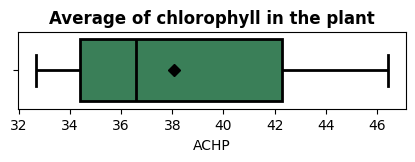

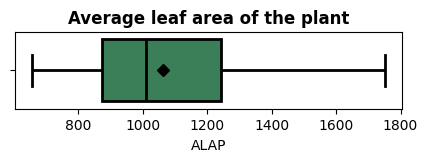

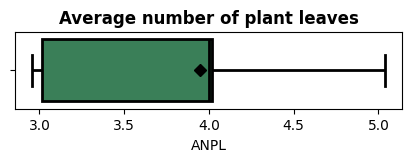

In [155]:
# Outliers were checked by plotting the columns containing numeric values on boxplots as well. 
meanprops = dict(markerfacecolor='black', marker='D', markeredgecolor='black', markersize=6)
flierprops = dict(markerfacecolor='black', marker='o')
medianprops = dict(color='black', linewidth=2)

plt.figure(figsize=(5,1), dpi=100)
sns.boxplot(x=greenhouse_stat2['ACHP'], color='seagreen', vert=False, flierprops=flierprops, showmeans=True, meanprops=meanprops, medianprops=medianprops, linecolor='black', linewidth=2)
plt.title('Average of chlorophyll in the plant', fontweight='bold')
plt.show()


plt.figure(figsize=(5,1), dpi=100)
sns.boxplot(x=greenhouse_stat2['ALAP'], color='seagreen', vert=False, flierprops=flierprops, showmeans=True, meanprops=meanprops, medianprops=medianprops, linecolor='black', linewidth=2)
plt.title('Average leaf area of the plant', fontweight='bold')
plt.show()


plt.figure(figsize=(5,1), dpi=100)
sns.boxplot(x=greenhouse_stat2['ANPL'], color='seagreen', vert=False, flierprops=flierprops, showmeans=True, meanprops=meanprops, medianprops=medianprops, linecolor='black', linewidth=2)
plt.title('Average number of plant leaves', fontweight='bold')
plt.show()

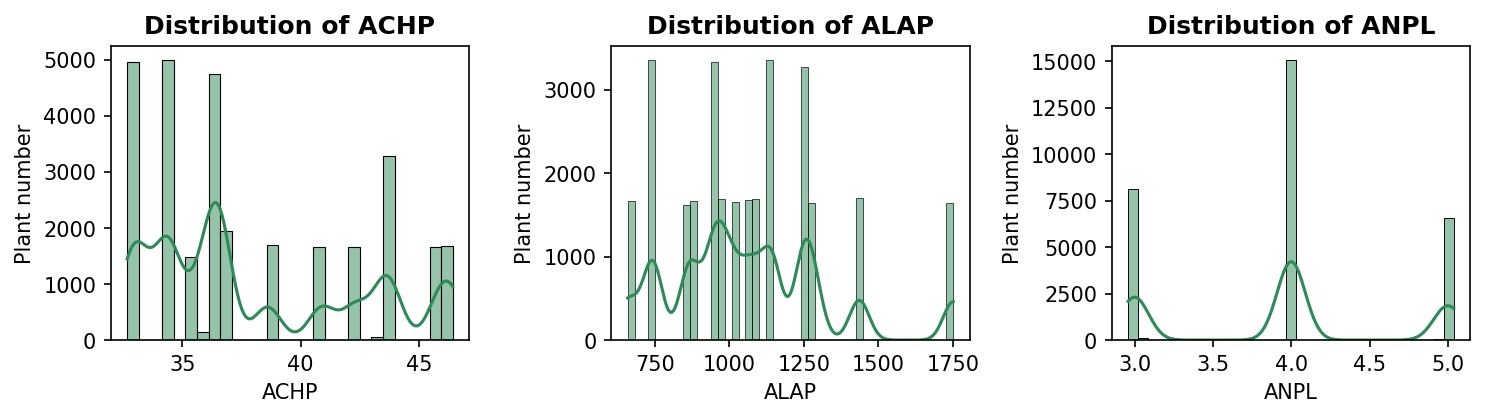

In [153]:
# Plotting histograms for numerical values for cheking the distribution of the datasets
num_columns = greenhouse_stat2.select_dtypes(include=[np.number]).columns.tolist()
num_plots = len(num_columns)

plt.figure(figsize=(10, 5), dpi=150)
for i, col in enumerate(num_columns):
    plt.subplot((num_plots // 3) + 1, 3, i + 1)
    sns.histplot(greenhouse_stat2[col], kde=True, color='seagreen')
    plt.title(f'Distribution of {col}', fontweight='bold')
    plt.ylabel('Plant number')
plt.tight_layout()
plt.show()

In [156]:
# Random samples have been chosen from the three datasets to perform Shapiro-Wilk test for normality.
sampled_data_ACHP = greenhouse_stat2.ACHP.sample(n=1000, replace=True, random_state=42)
sampled_data_ALAP = greenhouse_stat2.ALAP.sample(n=1000, replace=True, random_state=42)
sampled_data_ANPL = greenhouse_stat2.ANPL.sample(n=1000, replace=True, random_state=42)
sampled_data_ACHP.head()

23654    42.280600
15795    36.594634
860      36.316401
5390     34.399941
29802    38.606961
Name: ACHP, dtype: float64

In [157]:
sampled_data_ALAP.head()

23654    1142.929030
15795     739.258477
860       981.448296
5390     1253.977961
29802     948.680487
Name: ALAP, dtype: float64

In [158]:
sampled_data_ANPL.head()

23654    3.010942
15795    3.016267
860      4.009828
5390     3.998718
29802    3.996078
Name: ANPL, dtype: float64

In [159]:
# New dataframe (shapiro_df) has been created containing the sampled datasets with using the concat() function.
# First, I merged the three sampled DataFrames into one DataFrame.
shapiro_df = pd.concat([sampled_data_ACHP.reset_index(drop=True), 
                         sampled_data_ALAP.reset_index(drop=True), 
                         sampled_data_ANPL.reset_index(drop=True)], 
                        axis=1)

# I renamed the columns to reflect the original column names.
shapiro_df.columns = ['ACHP', 'ALAP', 'ANPL']

shapiro_df

,ACHP,ALAP,ANPL
0,42.280600,1142.929030,3.010942
1,36.594634,739.258477,3.016267
2,36.316401,981.448296,4.009828
3,34.399941,1253.977961,3.998718
4,38.606961,948.680487,3.996078
...,...,...,...
995,45.916817,875.499601,3.996872
996,45.888226,875.509002,3.996104
997,43.803778,1054.629914,3.995903
998,43.802879,1054.628309,4.001458


In [160]:
# Perform the Shapiro-Wilk test for normality.

shapiro_columns = shapiro_df[['ACHP', 'ALAP', 'ANPL']]

stat_analysis = {}
for column in shapiro_columns.columns:
    stat_analysis[column] = {
        'Shapiro': stats.shapiro(shapiro_columns[column]),
        'Kurtosis': stats.kurtosis(shapiro_columns[column]),
        'Skewness': stats.skew(shapiro_columns[column])
    }

stat_analysis_df = pd.DataFrame(stat_analysis).T
stat_analysis_df.to_html('stat_analysis.html')
stat_analysis_df
# Shapiro: 1. value: t-stat of the test, 2. value: p-value

,Shapiro,Kurtosis,Skewness
ACHP,"(0.8775432641115362, 2.530816839293574e-27)",-1.206833,0.507605
ALAP,"(0.9367940967840901, 3.529944657640248e-20)",0.460484,0.760235
ANPL,"(0.8148245100388019, 2.2332552877627758e-32)",-0.904348,0.058926


In [161]:
# Another method for listing columns distributed non_normally.
# p-value < 0.05 indicates non-normal distribution
non_normal_cols = []
for column in shapiro_columns.columns:
    stat, p = stats.shapiro(shapiro_columns[column])
    if p < 0.05:  
        non_normal_cols.append(column)

print("Non-normally distributed columns:", non_normal_cols)

Non-normally distributed columns: ['ACHP', 'ALAP', 'ANPL']


### Statistical analysis

In [162]:
# Data were organozed into new dataframes.
ACHP_df = pd.concat([R1['ACHP'].reset_index(drop=True),
                     R2['ACHP'].reset_index(drop=True),
                     R3['ACHP'].reset_index(drop=True)],
                    axis=1)
ACHP_df.columns = ['R1', 'R2', 'R3']
ACHP_df

,R1,R2,R3
0,34.533468,33.100405,36.297008
1,34.489028,33.105558,36.287722
2,34.498319,33.092448,36.291859
3,34.498869,33.083002,36.288544
4,34.483695,33.101054,36.286543
...,...,...,...
10040,38.596259,NaN,NaN
10041,38.600989,NaN,NaN
10042,38.596402,NaN,NaN
10043,38.608736,NaN,NaN


In [163]:
ALAP_df = pd.concat([R1['ALAP'].reset_index(drop=True),
                     R2['ALAP'].reset_index(drop=True),
                     R3['ALAP'].reset_index(drop=True)],
                    axis=1)
ALAP_df.columns = ['R1', 'R2', 'R3']
ALAP_df

,R1,R2,R3
0,1284.229549,1009.208996,981.470310
1,1284.247744,1009.239638,981.460993
2,1284.227623,1009.218887,981.474687
3,1284.237645,1009.209977,981.474759
4,1284.224034,1009.230921,981.462996
...,...,...,...
10040,948.675317,NaN,NaN
10041,948.662769,NaN,NaN
10042,948.671452,NaN,NaN
10043,948.694799,NaN,NaN


In [164]:
ANPL_df = pd.concat([R1['ANPL'].reset_index(drop=True),
                     R2['ANPL'].reset_index(drop=True),
                     R3['ANPL'].reset_index(drop=True)],
                    axis=1)
ANPL_df.columns = ['R1', 'R2', 'R3']
ANPL_df

,R1,R2,R3
0,4.999713,5.007652,4.003682
1,5.024259,4.991835,3.998621
2,4.991501,4.995131,3.999853
3,4.992955,5.012751,3.999142
4,4.982078,5.011843,4.013441
...,...,...,...
10040,4.007709,NaN,NaN
10041,3.989026,NaN,NaN
10042,3.994569,NaN,NaN
10043,4.001414,NaN,NaN


In [74]:
# NaN values have been replaced by the mean values. 
mean_R2_ACHP = R2['ACHP'].mean()
mean_R3_ACHP = R3['ACHP'].mean()
mean_R2_ALAP = R2['ALAP'].mean()
mean_R3_ALAP = R3['ALAP'].mean()
mean_R2_ANPL = R2['ANPL'].mean()
mean_R3_ANPL = R3['ANPL'].mean()

In [165]:
ACHP_df.fillna({'R2': mean_R2_ACHP}, inplace=True)
ACHP_df.fillna({'R3': mean_R3_ACHP}, inplace=True)
ACHP_df

,R1,R2,R3
0,34.533468,33.100405,36.297008
1,34.489028,33.105558,36.287722
2,34.498319,33.092448,36.291859
3,34.498869,33.083002,36.288544
4,34.483695,33.101054,36.286543
...,...,...,...
10040,38.596259,37.282075,38.626678
10041,38.600989,37.282075,38.626678
10042,38.596402,37.282075,38.626678
10043,38.608736,37.282075,38.626678


In [166]:
ALAP_df.fillna({'R2': mean_R2_ALAP}, inplace=True)
ALAP_df.fillna({'R3': mean_R3_ALAP}, inplace=True)
ALAP_df

,R1,R2,R3
0,1284.229549,1009.208996,981.470310
1,1284.247744,1009.239638,981.460993
2,1284.227623,1009.218887,981.474687
3,1284.237645,1009.209977,981.474759
4,1284.224034,1009.230921,981.462996
...,...,...,...
10040,948.675317,1078.519694,1015.543199
10041,948.662769,1078.519694,1015.543199
10042,948.671452,1078.519694,1015.543199
10043,948.694799,1078.519694,1015.543199


In [167]:
ANPL_df.fillna({'R2': mean_R2_ANPL}, inplace=True)
ANPL_df.fillna({'R3': mean_R3_ANPL}, inplace=True)
ANPL_df

,R1,R2,R3
0,4.999713,5.007652,4.003682
1,5.024259,4.991835,3.998621
2,4.991501,4.995131,3.999853
3,4.992955,5.012751,3.999142
4,4.982078,5.011843,4.013441
...,...,...,...
10040,4.007709,3.836424,3.828452
10041,3.989026,3.836424,3.828452
10042,3.994569,3.836424,3.828452
10043,4.001414,3.836424,3.828452


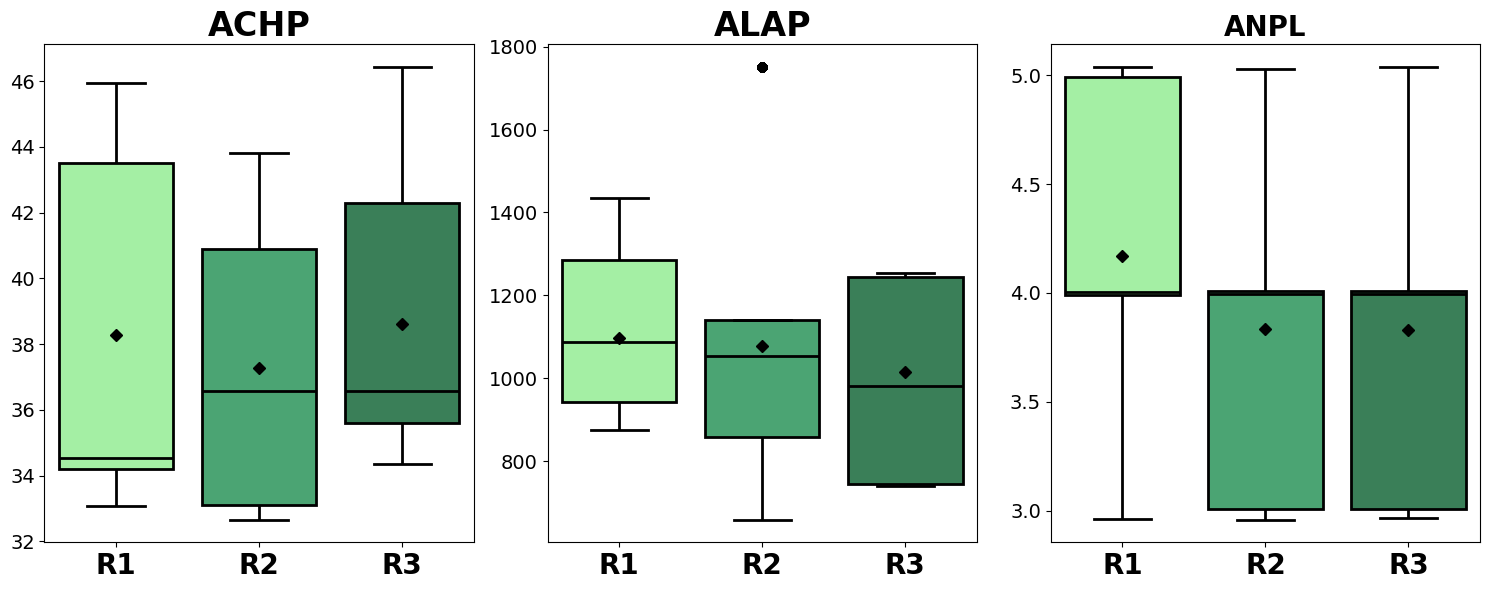

In [170]:
# Plotting the columns containing numeric values on boxplots for representing the differences of the random sample types.
meanprops = dict(markerfacecolor='black', marker='D', markeredgecolor='black', markersize=6)
flierprops = dict(markerfacecolor='black', marker='o')
medianprops = dict(color='black', linewidth=2)
my_pal = {'R1': 'palegreen', 'R2': 'mediumseagreen', 'R3':'seagreen'}

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.boxplot(data=ACHP_df, ax=axes[0], palette=my_pal, flierprops=flierprops, showmeans=True, meanprops=meanprops, medianprops=medianprops, linecolor='black', linewidth=2)
axes[0].set_title('ACHP',fontsize=24, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=20, fontweight='bold')
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=14)

sns.boxplot(data=ALAP_df, ax=axes[1], palette=my_pal, flierprops=flierprops, showmeans=True, meanprops=meanprops, medianprops=medianprops, linecolor='black', linewidth=2)
axes[1].set_title('ALAP',fontsize=24, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=20, fontweight='bold')
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=14)

sns.boxplot(data=ANPL_df, ax=axes[2], palette=my_pal, flierprops=flierprops, showmeans=True, meanprops=meanprops, medianprops=medianprops, linecolor='black', linewidth=2)
axes[2].set_title('ANPL', fontsize=20, fontweight='bold')
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=20, fontweight='bold')
axes[2].set_yticklabels(axes[2].get_yticklabels(), fontsize=14)

plt.tight_layout()

plt.show()

warnings.filterwarnings('ignore')

In [171]:
# H0: There are no significant differences between the different plant types (R1, R2, R3).
# regarding their morphometric and quantiative properties (ACHP, ALAP or ANPL) 

# Perform Kruskal-Wallis H-test
stat, p_value = kruskal(ACHP_df['R1'], ['R2'], ['R3'])

print(f"Kruskal-Wallis H-test statistic: {stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the distributions of R1, R2, and R3.")
else:
    print("There is no significant difference between the distributions of R1, R2, and R3.")

Kruskal-Wallis H-test statistic: 5.998208658158546
P-value: 0.04983168117344313
There is a significant difference between the distributions of R1, R2, and R3.


In [172]:
# Mann-Whitney U test on ACHP_df dataframe

columns = ['R1', 'R2', 'R3']

# Function to perform Mann-Whitney U test for pairwise comparisons
def pairwise_mannwhitneyu(ACHP_df, columns):
    results = {}
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1, col2 = columns[i], columns[j]
            stat, p_value = mannwhitneyu(ACHP_df[col1], ACHP_df[col2], alternative='two-sided')
            results[f'{col1} vs {col2}'] = {'U-statistic': stat, 'p-value': p_value}
    return results

pairwise_results = pairwise_mannwhitneyu(ACHP_df, columns)

for comparison, result in pairwise_results.items():
    print(f"{comparison}: U-statistic = {result['U-statistic']}, p-value = {result['p-value']}")
# H0 was rejected in every cases, plant types were significantly different from each other regarding the chlorophyll content.

R1 vs R2: U-statistic = 56971204.0, p-value = 1.1331347670290098e-56
R1 vs R3: U-statistic = 41636201.0, p-value = 4.941714513928499e-102
R2 vs R3: U-statistic = 43681427.0, p-value = 5.995489182060861e-61


In [173]:
# Mann-Whitney U test on ALAP_df dataframe

columns = ['R1', 'R2', 'R3']

# Function to perform Mann-Whitney U test for pairwise comparisons
def pairwise_mannwhitneyu(ALAP_df, columns):
    results = {}
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1, col2 = columns[i], columns[j]
            stat, p_value = mannwhitneyu(ALAP_df[col1], ALAP_df[col2], alternative='two-sided')
            results[f'{col1} vs {col2}'] = {'U-statistic': stat, 'p-value': p_value}
    return results

pairwise_results = pairwise_mannwhitneyu(ALAP_df, columns)

for comparison, result in pairwise_results.items():
    print(f"{comparison}: U-statistic = {result['U-statistic']}, p-value = {result['p-value']}")
# H0 was rejected in every cases, plant types were significantly different from each other regarding the leaf area.

R1 vs R2: U-statistic = 55943307.0, p-value = 9.989607968469545e-41
R1 vs R3: U-statistic = 59088291.0, p-value = 4.8441716919346305e-98
R2 vs R3: U-statistic = 47994320.0, p-value = 2.271425719117423e-09


In [174]:
# Mann-Whitney U test on ANPL_df dataframe

columns = ['R1', 'R2', 'R3']

# Function to perform Mann-Whitney U test for pairwise comparisons
def pairwise_mannwhitneyu(ANPL_df, columns):
    results = {}
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1, col2 = columns[i], columns[j]
            stat, p_value = mannwhitneyu(ANPL_df[col1], ANPL_df[col2], alternative='two-sided')
            results[f'{col1} vs {col2}'] = {'U-statistic': stat, 'p-value': p_value}
    return results

pairwise_results = pairwise_mannwhitneyu(ANPL_df, columns)

for comparison, result in pairwise_results.items():
    print(f"{comparison}: U-statistic = {result['U-statistic']}, p-value = {result['p-value']}")
# H0 was rejected in R1 compared to the others, but no significant difference found between R2 and R3 
# regarding the leaf number.

R1 vs R2: U-statistic = 62980828.0, p-value = 4.1334572224423925e-204
R1 vs R3: U-statistic = 63236463.0, p-value = 1.9463838057506312e-212
R2 vs R3: U-statistic = 50757860.0, p-value = 0.4553322219182767


In [175]:
# Check the data summary
print(R1[['ACHP', 'ALAP', 'ANPL']].describe())
print(R2[['ACHP', 'ALAP', 'ANPL']].describe())
print(R3[['ACHP', 'ALAP', 'ANPL']].describe())

               ACHP          ALAP          ANPL
count  10045.000000  10045.000000  10045.000000
mean      38.269069   1096.749381      4.167994
std        4.878118    202.314430      0.684076
min       33.069053    875.462334      2.963115
25%       34.199439    943.623715      3.990200
50%       34.524010   1087.414727      4.004081
75%       43.500494   1284.235989      4.993119
max       45.933413   1435.653743      5.037358
              ACHP         ALAP         ANPL
count  9959.000000  9959.000000  9959.000000
mean     37.282075  1078.519694     3.836424
std       3.989525   337.237512     0.685411
min      32.664004   658.488225     2.959173
25%      33.100155   857.838926     3.007139
50%      36.575525  1054.616963     3.995937
75%      40.900213  1140.422122     4.009829
max      43.828875  1751.031654     5.029713
              ACHP         ALAP         ANPL
count  9996.000000  9996.000000  9996.000000
mean     38.626678  1015.543199     3.828452
std       4.298267   214.319

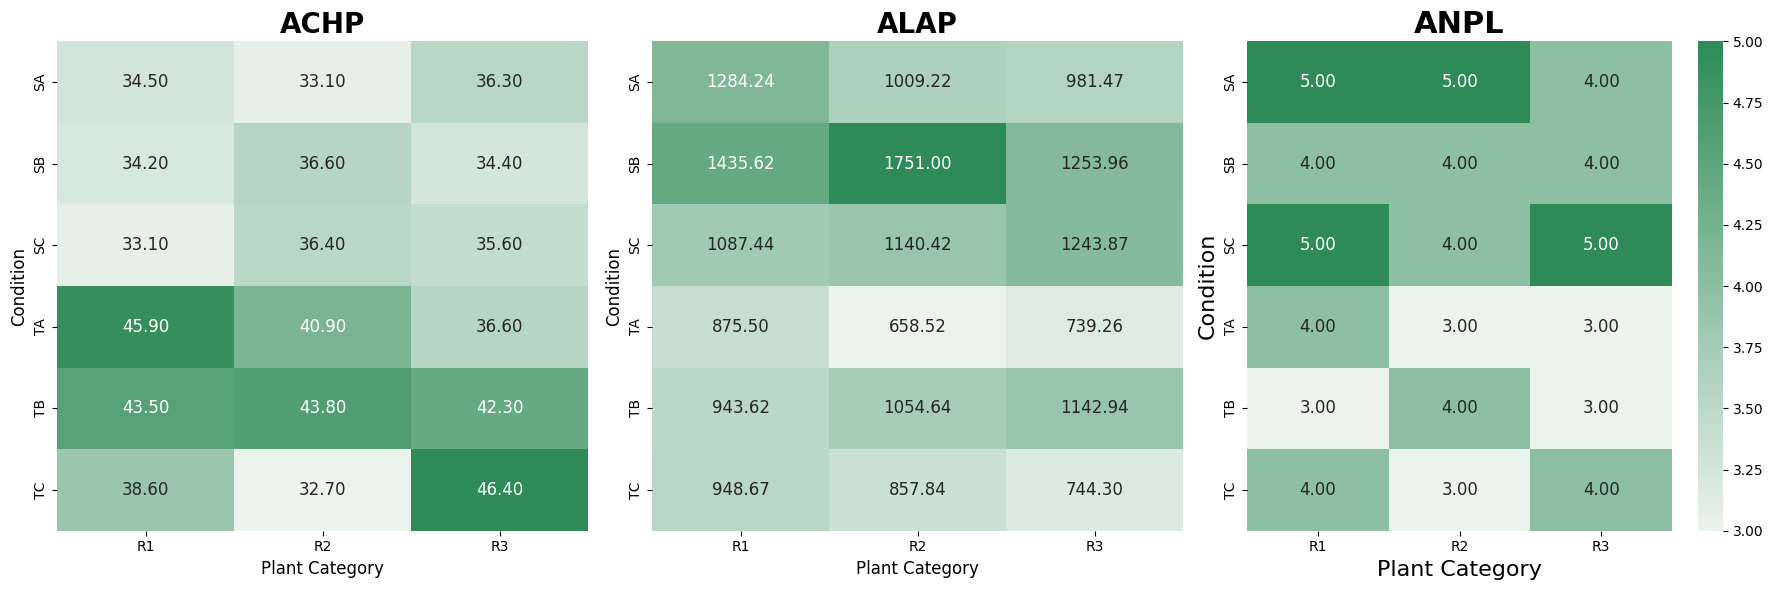

In [177]:
# Representative heatmap to visualize differences of morphometric and quantiative features (ACHP, ALAP, ANPL)
# between the plant types (R1, R2, R3)
df = greenhouse_stat

# Pivot the data for each metric
heatmap_data_achp = df.pivot_table(values='ACHP', index='Condition', columns='Plant Category')
heatmap_data_alap = df.pivot_table(values='ALAP', index='Condition', columns='Plant Category')
heatmap_data_anpl = df.pivot_table(values='ANPL', index='Condition', columns='Plant Category')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
cmap = sns.light_palette("seagreen", as_cmap=True)

sns.heatmap(heatmap_data_achp, ax=axes[0], cmap=cmap, annot=True, fmt=".2f", cbar=False, annot_kws={"fontsize": 12})
axes[0].set_title('ACHP', fontsize=20, fontweight='bold')
axes[0].set_ylabel('Condition', fontsize=12)
axes[0].set_xlabel('Plant Category', fontsize=12)

sns.heatmap(heatmap_data_alap, ax=axes[1], cmap=cmap, annot=True, fmt=".2f", cbar=False, annot_kws={"fontsize": 12})
axes[1].set_title('ALAP', fontsize=20, fontweight='bold')
axes[1].set_ylabel('Condition', fontsize=12)
axes[1].set_xlabel('Plant Category', fontsize=12)

sns.heatmap(heatmap_data_anpl, ax=axes[2], cmap=cmap, annot=True, fmt=".2f", cbar=True, annot_kws={"fontsize": 12})
axes[2].set_title('ANPL', fontsize=22, fontweight='bold')
axes[2].set_ylabel('Condition', fontsize=16)
axes[2].set_xlabel('Plant Category', fontsize=16)

plt.tight_layout()
plt.show()

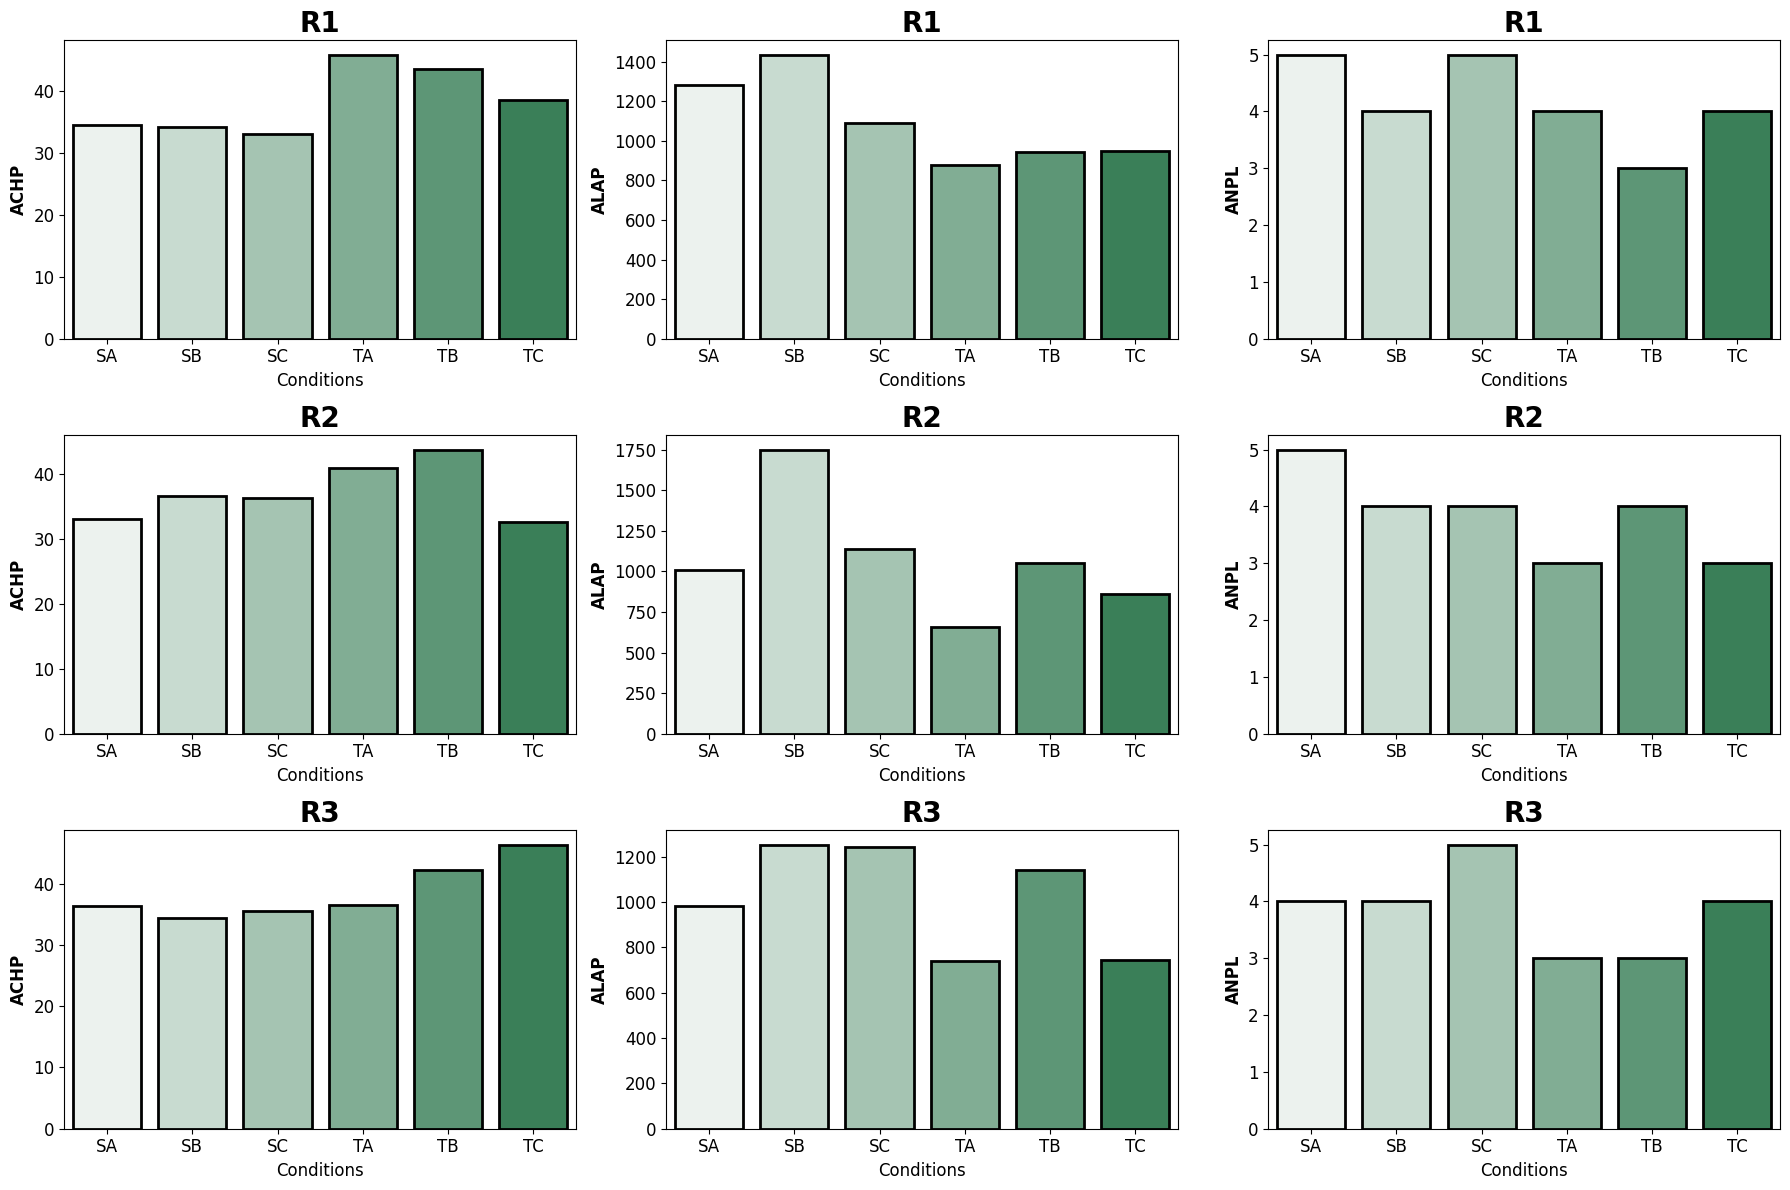

In [135]:
# Bar charts to visualize differences between the different conditions.

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
palette = sns.light_palette("seagreen")

dataframes = [R1, R2, R3]

columns = ['ACHP', 'ALAP', 'ANPL']
titles = ['R1', 'R2', 'R3']

for i, df in enumerate(dataframes):
    for j, col in enumerate(columns):
        sns.barplot(x='Condition', y=col, data=df, ax=axes[i, j], errorbar=None, palette=palette, hue='Condition', linewidth=2, edgecolor='black')
        axes[i, j].set_title(f'{titles[i]}', fontsize=20, fontweight='bold')
        axes[i, j].set_xlabel('Conditions', fontsize=12)
        axes[i, j].set_ylabel(col, fontsize=12, fontweight='bold')
        axes[i, j].tick_params(axis='both', which='major', labelsize=12)  # Set font size for tick labels
       
plt.tight_layout()
plt.show()

In [178]:
# Creation of a function to perform Shapiro-Wilk test again for the data sets of conditions.
# H0: The data was drawn from a normal distribution.

def shapiro_test_by_condition(df, col):
    results = []
    conditions = df['Condition'].unique()
    for condition in conditions:
        data = df[df['Condition'] == condition][col]
        stat, p_value = shapiro(data)
        results.append({'Condition': condition, 'W-statistic': stat, 'p-value': p_value})
    return pd.DataFrame(results)

dataframes = [R1, R2, R3]
columns = ['ACHP', 'ALAP', 'ANPL']
titles = ['R1', 'R2', 'R3']

shapiro_results = {}

for df, title in zip(dataframes, titles):
    for col in columns:
        key = f'{title} - {col}'
        shapiro_results[key] = shapiro_test_by_condition(df, col)

for key, result in shapiro_results.items():
    print(f'\nShapiro-Wilk Test Results for {key}')
    print(result)
# Almost all of the data sets were normally distributed.


Shapiro-Wilk Test Results for R1 - ACHP
  Condition  W-statistic   p-value
0        SA     0.998802  0.330430
1        SB     0.999581  0.983705
2        SC     0.998970  0.453220
3        TA     0.999369  0.875895
4        TB     0.998883  0.396184
5        TC     0.998172  0.058251

Shapiro-Wilk Test Results for R1 - ALAP
  Condition  W-statistic   p-value
0        SA     0.998622  0.213720
1        SB     0.999148  0.632874
2        SC     0.998789  0.298868
3        TA     0.999395  0.896206
4        TB     0.998985  0.491017
5        TC     0.999406  0.898166

Shapiro-Wilk Test Results for R1 - ANPL
  Condition  W-statistic   p-value
0        SA     0.998447  0.136711
1        SB     0.999293  0.791019
2        SC     0.998289  0.080455
3        TA     0.998928  0.426201
4        TB     0.999164  0.680255
5        TC     0.997418  0.007285

Shapiro-Wilk Test Results for R2 - ACHP
  Condition  W-statistic   p-value
0        SA     0.999225  0.740038
1        SB     0.999318  0.837

In [179]:
# Creation of a function to perform One-way ANOVA and Tukey's HSD for a given dataframe and column

# H0: There are no significant differences in the morphometric and quantiative properties ('ACHP', 'ALAP' or 'ANPL') 
# of plant types (R1, R2 or R3) kept on different conditions (SA, SB, SC, TA, TB, TC).

def anova_and_pairwise(df, col):
    # Perform One-way ANOVA
    groups = [df[df['Condition'] == condition][col] for condition in df['Condition'].unique()]
    anova_result = f_oneway(*groups)
    
    # Tukey's HSD for pairwise comparisons
    tukey = pairwise_tukeyhsd(endog=df[col], groups=df['Condition'], alpha=0.05)
    
    # Formatting p-value to 5 decimal places
    anova_table = pd.DataFrame({
        'F-statistic': [anova_result.statistic],
        'p-value': [round(anova_result.pvalue, 5)]
    })

    # Extract Tukey HSD table and format p-adj values to 5 decimals
    tukey_table = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
    tukey_table['p-adj'] = tukey_table['p-adj'].round(5)

    return anova_table, tukey_table

dataframes = [R1, R2, R3]
columns = ['ACHP', 'ALAP', 'ANPL']
titles = ['R1', 'R2', 'R3']

anova_results = {}
tukey_results = {}

for df, title in zip(dataframes, titles):
    for col in columns:
        key = f'{title} - {col}'
        anova_results[key], tukey_results[key] = anova_and_pairwise(df, col)

for key in anova_results:
    print(f'\nANOVA Results for {key}')
    print(anova_results[key])
    print(f'\nTukey HSD Results for {key}')
    print(tukey_results[key])

# Results: 
# ACHP and ALAP rejected the H0 in every cases, meaning there were significant differences between the different conditions in every cases.
# ANPL rejected the H0 most of times, but there were cases with no significant differences between the different conditions in every cases.
# Different conditions have an effect on the chlorophyll content and leaf area of the plants more than on the number of the leaves.


ANOVA Results for R1 - ACHP
    F-statistic  p-value
0  4.726976e+08      0.0

Tukey HSD Results for R1 - ACHP
   group1 group2  meandiff  p-adj    lower    upper  reject
0      SA     SB   -0.3001    0.0  -0.3011  -0.2991    True
1      SA     SC   -1.4004    0.0  -1.4014  -1.3994    True
2      SA     TA   11.4000    0.0  11.3990  11.4010    True
3      SA     TB    9.0004    0.0   8.9994   9.0014    True
4      SA     TC    4.0999    0.0   4.0989   4.1009    True
5      SB     SC   -1.1003    0.0  -1.1013  -1.0993    True
6      SB     TA   11.7001    0.0  11.6991  11.7011    True
7      SB     TB    9.3005    0.0   9.2995   9.3015    True
8      SB     TC    4.4000    0.0   4.3990   4.4010    True
9      SC     TA   12.8004    0.0  12.7994  12.8014    True
10     SC     TB   10.4008    0.0  10.3998  10.4018    True
11     SC     TC    5.5003    0.0   5.4993   5.5013    True
12     TA     TB   -2.3996    0.0  -2.4006  -2.3986    True
13     TA     TC   -7.3001    0.0  -7.3011  -7.2